# Replication of Lab 4

# Group 6
Members:
1. Eljaer Eusebio
2. Claudia Vivas
3. Luis Sandoval
4. Andre Tapia

# Question 1 

## Orthogonal Learning

### Naive Method
The first step of this method is to generate a lasso regression to discard the unnecessary variables, then regress D in Y using the variables not discarded by the Lasso regression using an OLS model. In this way it finds the estimated coefficient of the treatment.

### Neyman orthogonality
Neyman's orthogonality holds that the estimated coefficient $(\ alpha)$ of the treatment depends on the coefficients estimated via partialing-out. That is, $\ alpha$ is insensitive to changes in the estimated coefficients via partialing-out.

Taking into account the concept of orthogonality, the estimation of the treatment coefficient using a double lasso via partialling-out model generates an estimated coefficient with a lower standard error, since this is more similar to the population coefficient. This is because in the second step of the partialling-out algorithm the treatment (D) is cleaned of all possible effects of D. In this sense, the coefficient estimated via partialling-out closely resembles the population parameter and complies with Neyman's orthogonality. However, the naive method generates a less precise estimated coefficient than the previous method, because although it uses laso and ols regression, it does not clean up the effects of X on D. This difference in the estimated coefficients can be observed in the histogram distributions for the following trials.

### 50 trials

In [6]:
library(hdm)

set.seed(1)
B= 50 
Naive = rep(0, B) 
Orthogonal = rep(0, B) 

for (i in 1:B){
    
n=100 
p= 100 
beta = 1/(1:p)^2
gamma =1/(1:p)^2 # este es un numero cualquiera

X=matrix(rnorm(n*p), n, p) 
D=   X%*%gamma + rnorm(n)/4 
Y = 5*D+ X%*%beta + rnorm(n) 
    
# NAIVE METHOD    
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso

if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]} 
if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}  
       
#LASSO using partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


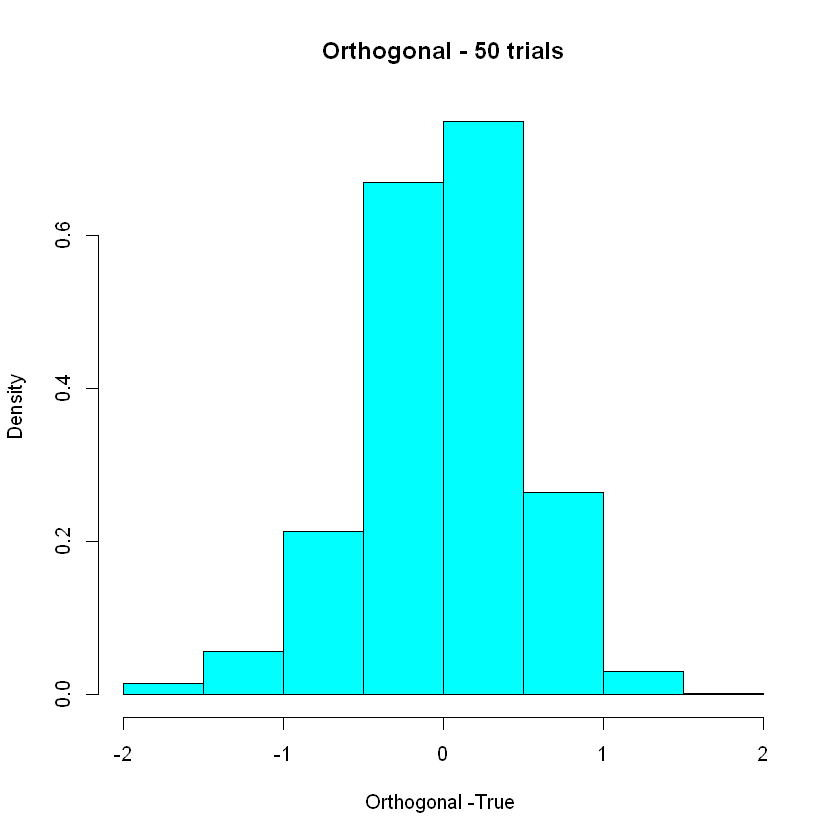

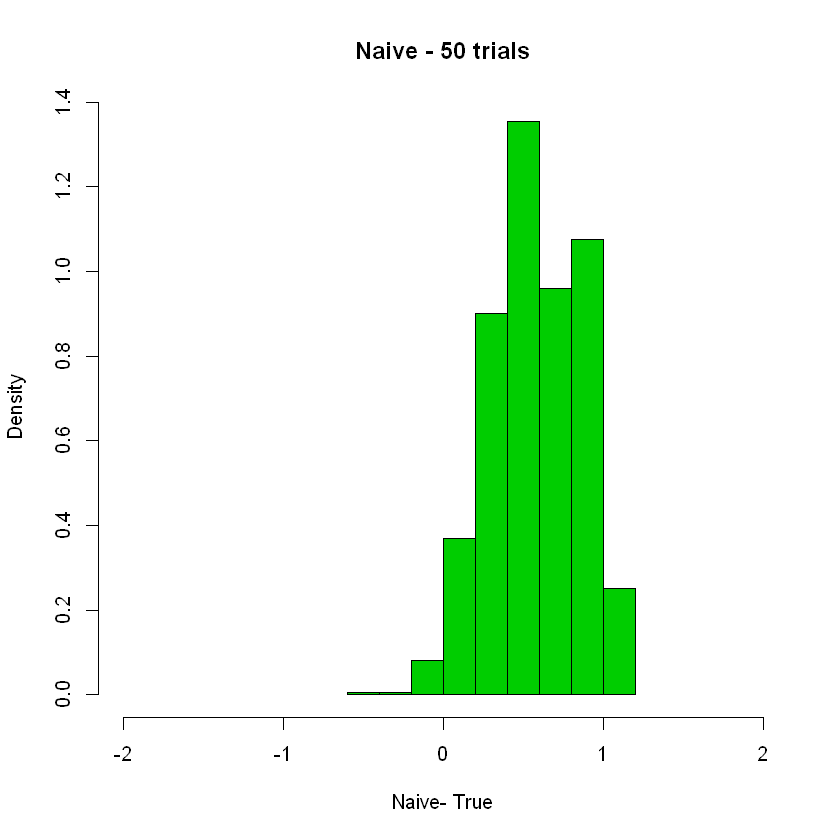

In [106]:
hist(Orthogonal-5,col=5, freq=F, xlim= c(-2, 2), xlab= "Orthogonal -True ", main="Orthogonal - 50 trials", breaks=7)
hist(Naive-5, col=3, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive - 50 trials", breaks=7)


The population coefficient is 5, however at the time of graphing the histograms we subtract 5 from the estimated coefficients so that they can be centered on 0. In the first histogram, it is observed that the largest number of estimated coefficients resulting from the 50 trials are centered on zero. However, in the second histogram it is observed that the distribution is centered on a value between zero and one. In the first case, the neyman orthogonality is fulfilled, while in the second case the naive method is used, which biases the estimation of the treatment coefficient (D), since there is the influence of covariates X on D and because we created the process data generator, since D is not random.

### 100 trials

In [10]:
library(hdm)

set.seed(1)
B= 100 
Naive = rep(0, B) 
Orthogonal = rep(0, B) 

for (i in 1:B){
    
n=100 
p= 100 
beta = 1/(1:p)^2
gamma =1/(1:p)^2 

X=matrix(rnorm(n*p), n, p) 
D=   X%*%gamma + rnorm(n)/4 
Y = 5*D+ X%*%beta + rnorm(n) 
    
# NAIVE METHOD    
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  

if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]} 
if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}  
       
#LASSO using partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

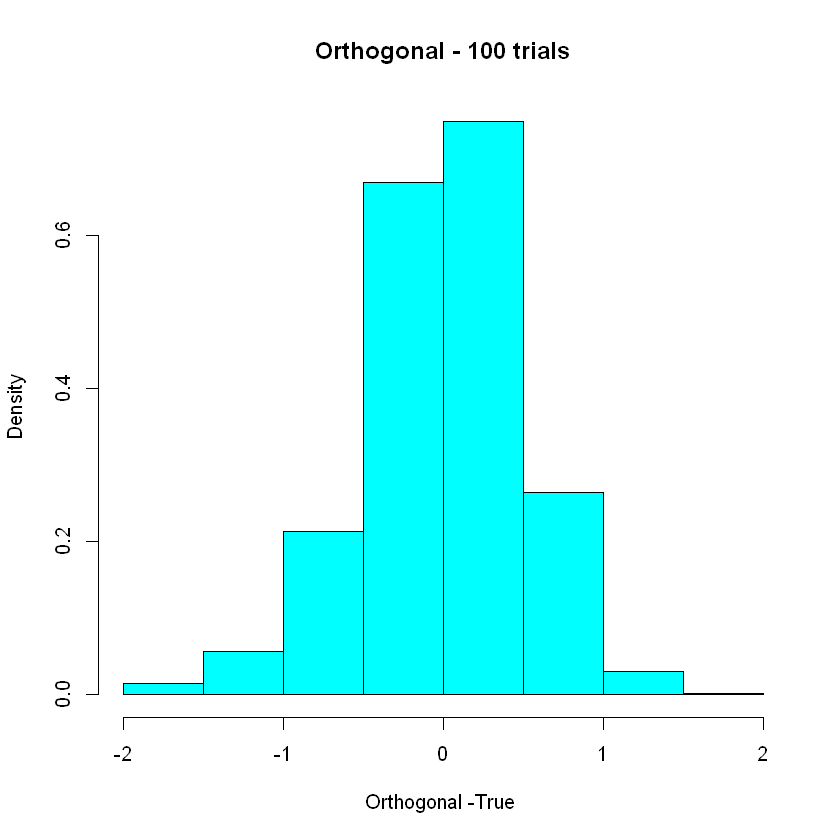

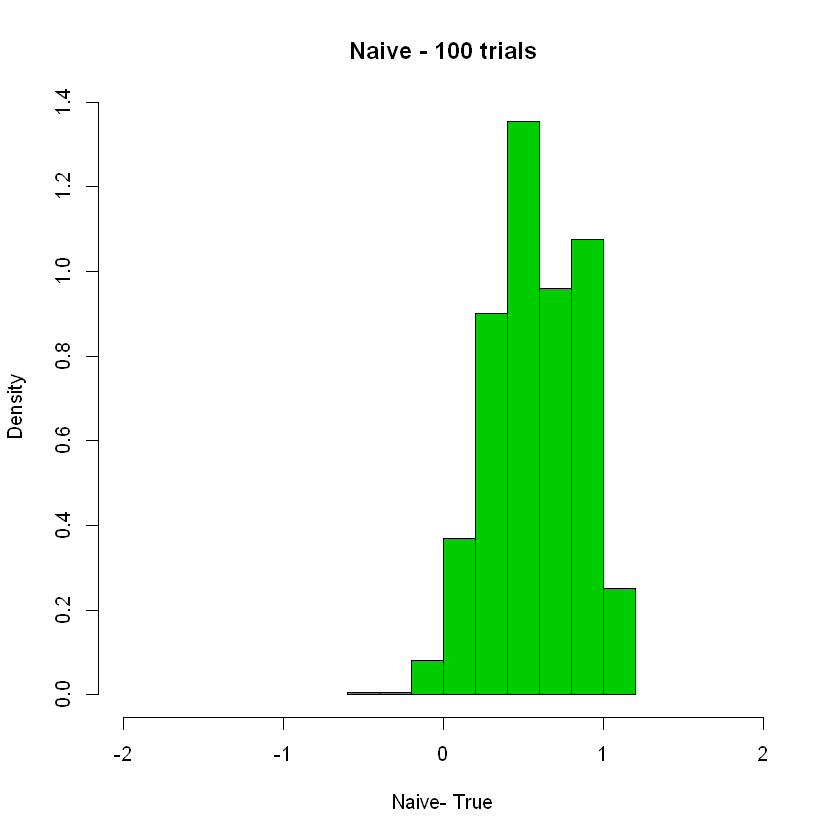

In [105]:
hist(Orthogonal-5,col=5, freq=F, xlim= c(-2, 2), xlab= "Orthogonal -True ", main="Orthogonal - 100 trials", breaks=10) 
hist(Naive-5, col=3, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive - 100 trials", breaks=10)


In this case, it is observed that the first histogram takes the form of a normal distribution centered on zero, while the second histogram centers its distribution centered on a value between zero and one. As in the previous scenario, the coefficient estimated with the navie method is biased.

### 1000 trials

In [15]:
library(hdm)

set.seed(1)
B= 1000 
Naive = rep(0, B) 
Orthogonal = rep(0, B) 

for (i in 1:B){
    
n=100 
p= 100 
beta = 1/(1:p)^2
gamma =1/(1:p)^2 

X=matrix(rnorm(n*p), n, p) 
D=   X%*%gamma + rnorm(n)/4 
Y = 5*D+ X%*%beta + rnorm(n) 
    
# NAIVE METHOD    
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  

if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]} 
if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}  
       
#LASSO using partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

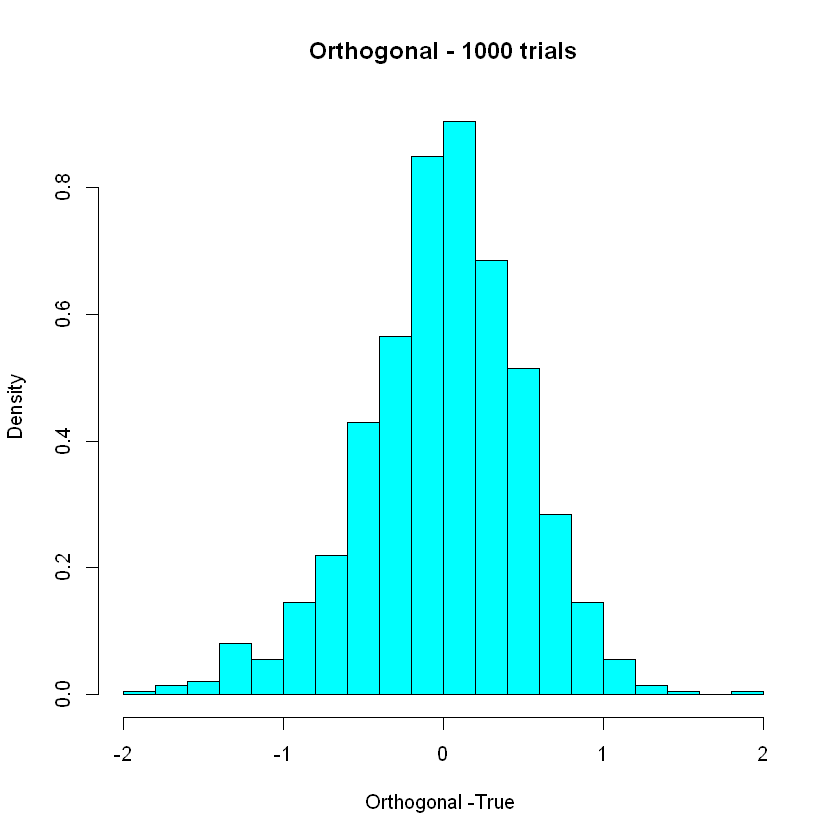

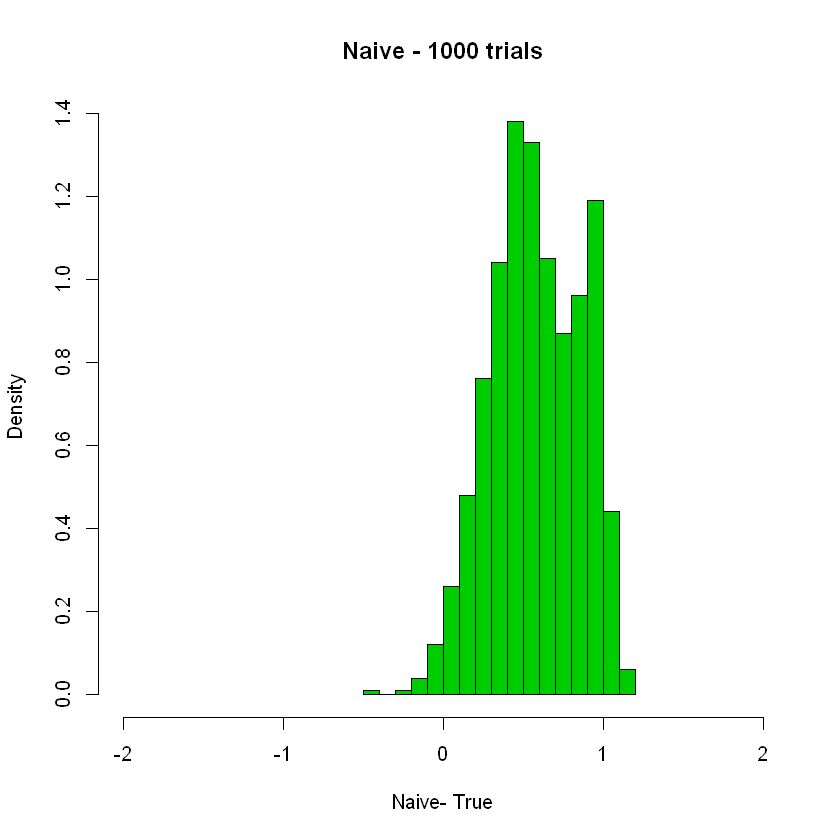

In [107]:
hist(Orthogonal-5,col=5, freq=F, xlim= c(-2, 2), xlab= "Orthogonal -True ", main="Orthogonal - 1000 trials", breaks=15) 
hist(Naive-5, col=3, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive - 1000 trials", breaks=15)

In the scenario where we simulate 1000 scenarios, it is observed that the distribution of the first histogram resembles a normal distribution centered on zero. On the other hand, the second histogram has a distribution similar to a normal distribution centered on a value between zero and one.

# Question 2

# Testing the Convergence Hypothesis

## Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.

The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Double-Lasso Approach

We have some problems running regressions with many candidate predictors. Finding a model that helps us make decisions about which variables will be interesting and which ones is not a delicate task. Therefore, the main objective is to find a suitable model.

One of them is related to DOUBLE-LASSO models, its method combines a regression model with a process of contractions of some parameters to zero and imposes a restriction or penalty on the regression coefficients, to select variables by two step, finding those that predict the dependent variable and those relative to independent variable. This is important, because exclusion of a covariate that is a modest predictor of the dependent variable but strong predictor of the independent variable can create a substantial omitted variable bias.Also, it helps to make test of randomization.

In the following lines, the explanation about Lasso's steps will be explained according to the article "Using double-loop regression for the selection of principle variables" by Urminsky, Hansen and Chernozhukov,

First, they estimate a linear regression model, because they want to find parameters that minimize the sum of squared errors in the regression equation:

$$
 Y_i= \beta_{0} + \beta_{1}X_i +  \beta_{2}W_i1+...+ \beta_{k+1}W_ik+e_{i}\
$$

A lasso regression find parameters which minimize the sum of squared errors in the regression equation with an additional penalty term:

$$
Min [\sum_{i}(Y_i - \beta_{0} + \beta_{1}X_i +  \beta_{2}W_i1+...+ \beta_{k+1}W_ik)^2 + \lambda \sum_{k}|\beta_{k}|
$$

The penalty term helps reduce the estimated regression coefficients to zero, and some are exactly zero, reducing the over-fitting. By setting some coefficients to zero, you also perform variable selection. Loop regression can be used when the number of observations is smaller than the number of predictors. However, we could omit important variables with nonzero coefficients and underestimate some nonzero coefficients. It would be a bias in the model. In this case, it is necessary to use the "double lasso" to select variables and alleviate both sources of bias.

Step 1:Fit a lasso regression predicting the dependent variable, and keeping track of the variables with non-zero estimated coefficients:

$$
Y_i= \alpha_{0} + \alpha_{1}W_i1 +...+ \alpha_{k}W_ik+e_{i}\
$$

Step 2: Fit a lasso regression predicting the focal independent variable, keeping track of the variables with non-zero estimated coefficients:

$$
X_i= \phi_{0} + \phi_{1}W_i1 +...+ \phi_{k}W_ik+e_{i}\
$$

If Xi is an effectively randomized treatment, no covariates should be selected in this step.

Step 3: Fit a linear regression of the dependent variable on the focal independent variable, including the covariates (Wik) selected in either of the first two steps

$$
Y_i= \alpha_{0} + \alpha_{1}W_i1 + \sum_{k \in A} \beta_{k+1}+...+ \alpha_{k}W_ik+e_{i}\
$$

In the equation, A is the union of the variables estimated to have non-zero coefficients in Steps 1 and 2. This regression could also include a small set of additional covariates identified a priori as necessary. Interpret and report the coefficient estimates and significance tests on the focal variable(s) as the final results. So, lambda is important to avoid over-fitting.








 









In [1]:
library(hdm)
library(xtable)

Warning message:
"package 'hdm' was built under R version 3.6.3"Warning message:
"package 'xtable' was built under R version 3.6.3"

In [2]:
# Export data to read in python
GrowthData <- GrowthData
save(GrowthData, file = "C:/Users/sniff/Documents/Estadistica aplicada/PD5GrowthData.RData")

In [3]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

In [4]:
dim(growth)

[1] 90 63

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small, so we can use double lasso to prove the converge hypothesis. We use the follow models: 
- Ordinary least square (OLS)
- Double lasso using cross validation
- Double lasso using theoretical Lambda
- Double lasso using partialling-out

### Ordinary least square (OLS)

In [9]:
reg.ols <- lm(Outcome~.-1,data=growth)
est_ols <- summary(reg.ols)$coef["gdpsh465",1] 
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2] 
# output: std. error

ci_ols <- confint(reg.ols)[2,] 
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [10]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab1<- xtable(table, digits = 3)
print(tab1,type="html")

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 17:40:41 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 21:35:11 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

According to OLS, we can see a rather noisy estimate of the speed of convergence because it has a high standard error. We can't answer if the convergence hypothesis since the confidence interval includes zero.


### Double lasso using cross validation

In [11]:
#splitting the data
set.seed(1234)
training <- sample(nrow(growth), nrow(growth)*(3/4), replace=FALSE)

data_train <- growth[training,]
data_test <- growth[-training,]

In [12]:
Y_train <- data_train$Outcome
Y_test <- data_test$Outcome

In [13]:
dim(data_train)

[1] 67 63

In [14]:
dim(data_test)

[1] 23 63

In [10]:
Y <- growth[, 1, drop = F] #output variable
W <- as.matrix(growth)[, -c(1, 2,3)] #controls
D <- growth[, 3, drop = F] #target regressor
X <- as.matrix(growth)[, -c(1, 2)] 
P <- "bmp1l + freeop + freetar + h65 + hm65 + hf65 + p65 + pm65 + pf65 + s65 + sm65 + sf65 + fert65 + mort65 + lifee065 + gpop1 + fert1 + mort1 + invsh41 + geetot1 + geerec1 + gde1 + govwb1 + govsh41 + gvxdxe41 + high65 + highm65 + highf65 + highc65 + highcm65 + highcf65 + human65 + humanm65 + humanf65 + hyr65 + hyrm65 + hyrf65 + no65 + nom65 + nof65 + pinstab1 + pop65 + worker65 + pop1565 + pop6565 + sec65 + secm65 + secf65 + secc65 + seccm65 + seccf65 + syr65 + syrm65 + syrf65 + teapri65 + teasec65 + ex1 + im1 + xr65 + tot1"   


In [23]:
formula_lasso_1 <- as.formula(paste("Outcome", "~", P)) # Y - W
formula_lasso_2 <- as.formula(paste("gdpsh465", "~", P)) # D - W

In [24]:
lasso_model_train_1 <- model.matrix(formula_lasso_1,data_train)
lasso_model_train_2 <- model.matrix(formula_lasso_2,data_train)

lasso_model_test_1 <- model.matrix(formula_lasso_1,data_test)
lasso_model_test_2 <- model.matrix(formula_lasso_2,data_test)

In [89]:
library(glmnet)

#lasso
fit.lasso.cv.1   <- cv.glmnet(lasso_model_train_1, Y_train, family="gaussian", alpha=1)
yhat.lasso.cv.1    <- predict(fit.lasso.cv.1, newx = lasso_model_test_1)
r.A <- Y - yhat.lasso.cv.1
R.A <- as.matrix(r.A, col.name=FALSE)

fit.lasso.cv.2   <- cv.glmnet(lasso_model_train_2, Y_train, family="gaussian", alpha=1)
yhat.lasso.cv.2    <- predict(fit.lasso.cv.2, newx = lasso_model_test_2)
r.B <- Y - yhat.lasso.cv.2
R.B <- as.matrix(r.B, col.name=FALSE)

partial.lasso_g1 <- lm(R.A ~ R.B)
est_lasso_g1 <- partial.lasso_g1$coef[2]
std_lasso_g1 <- summary(partial.lasso_g1)$coef[2,2]
ci_lasso_g1 <- confint(partial.lasso_g1)[2,]

Warning message in summary.lm(partial.lasso_g1):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(object, ...):
"essentially perfect fit: summary may be unreliable"

In [101]:
summary(partial.lasso_g1)

Warning message in summary.lm(partial.lasso_g1):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = R.A ~ R.B)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.088e-16  3.270e-19  1.461e-18  2.437e-18  1.489e-17 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 0.000e+00  1.307e-18 0.000e+00        1    
R.B         1.000e+00  2.560e-17 3.907e+16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.239e-17 on 88 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.526e+33 on 1 and 88 DF,  p-value: < 2.2e-16


In [96]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso_g1,std_lasso_g1,ci_lasso_g1[1],ci_lasso_g1[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double lasso using cross validation")
tab2<- xtable(table, digits = 3)
print(tab2,type = "html")

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 13:29:33 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double lasso using cross validation </td> <td align="right"> 1.000 </td> <td align="right"> 0.000 </td> <td align="right"> 1.000 </td> <td align="right"> 1.000 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 13:29:33 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double lasso using cross validation </td> <td align="right"> 1.000 </td> <td align="right"> 0.000 </td> <td align="right"> 1.000 </td> <td align="right"> 1.000 </td> </tr>
   </table>

In [105]:
#Ridge
fit.ridge.cv.1   <- cv.glmnet(lasso_model_train_1, Y_train, family="gaussian", alpha=0)
yhat.ridge.cv.1    <- predict(fit.ridge.cv.1, newx = lasso_model_test_1)
rid.A <- Y - yhat.ridge.cv.1
RID.A <- as.matrix(rid.A, col.name=FALSE)

fit.ridge.cv.2   <- cv.glmnet(lasso_model_train_2, Y_train, family="gaussian", alpha=0)
yhat.ridge.cv.2    <- predict(fit.ridge.cv.2, newx = lasso_model_test_2)
rid.B <- Y - yhat.lasso.cv.2
RID.B <- as.matrix(rid.B, col.name=FALSE)

partial.ridge_g2 <- lm(RID.A ~ RID.B)
est_ridge_g2 <- partial.ridge_g2$coef[2]
std_ridge_g2 <- summary(partial.ridge_g2)$coef[2,2]
ci_ridge_g2 <- confint(partial.ridge_g2)[2,]

Warning message in summary.lm(partial.ridge_g2):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(object, ...):
"essentially perfect fit: summary may be unreliable"

In [98]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ridge_g2,std_ridge_g2,ci_ridge_g2[1],ci_ridge_g2[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Ridge using cross validation")
tab3<- xtable(table, digits = 3)
print(tab3,type = "html")

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 13:30:01 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Ridge using cross validation </td> <td align="right"> 1.000 </td> <td align="right"> 0.000 </td> <td align="right"> 1.000 </td> <td align="right"> 1.000 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 13:30:01 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Ridge using cross validation </td> <td align="right"> 1.000 </td> <td align="right"> 0.000 </td> <td align="right"> 1.000 </td> <td align="right"> 1.000 </td> </tr>
   </table>

In [104]:
#Elastic-net

fit.elnet.cv.1   <- cv.glmnet(lasso_model_train_1, Y_train, family="gaussian", alpha=.5)
yhat.elnet.cv.1    <- predict(fit.elnet.cv.1, newx = lasso_model_test_1)
e.A <- Y - yhat.elnet.cv.1
E.A <- as.matrix(e.A, col.name=FALSE)

fit.elnet.cv.2   <- cv.glmnet(lasso_model_train_2, Y_train, family="gaussian", alpha=.5)
yhat.elnet.cv.2    <- predict(fit.elnet.cv.2, newx = lasso_model_test_2)
e.B <- Y - yhat.elnet.cv.2
E.B <- as.matrix(e.B, col.name=FALSE)

partial.elnet_g3 <- lm(E.A ~ E.B)
est_elnet_g3 <- partial.elnet_g3$coef[2]
std_elnet_g3 <- summary(partial.elnet_g3)$coef[2,2]
ci_elnet_g3 <- confint(partial.elnet_g3)[2,]

Warning message in summary.lm(partial.elnet_g3):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(object, ...):
"essentially perfect fit: summary may be unreliable"

In [106]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_elnet_g3,std_elnet_g3,ci_elnet_g3[1],ci_elnet_g3[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Ridge using cross validation")
tab3<- xtable(table, digits = 3)
print(tab3,type = "html")

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 13:41:14 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Ridge using cross validation </td> <td align="right"> 1.000 </td> <td align="right"> 0.000 </td> <td align="right"> 1.000 </td> <td align="right"> 1.000 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 13:41:14 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Ridge using cross validation </td> <td align="right"> 1.000 </td> <td align="right"> 0.000 </td> <td align="right"> 1.000 </td> <td align="right"> 1.000 </td> </tr>
   </table>

We tried to regress three models: double lasso (alpha = 1), ridge (alpha = 0) and elastic net (0 <alpha <1). First, we perform the sample splitting, then we perform partialling-out using training and test sample, finally, we regress the residuals using an OLS model. Despite having followed these steps, the estimated coefficients found are 1 and the standard errors are 0. Possibly, we are erring in some parts of the algorithm. On the other hand, the development algorithm for the double lasso model is developed by Urminsky O., Hansen C., and Chernozhukov V. in their paper "Using Double-Lasso Regression for Principled Variable Selection". It aims to identify covariates for inclusion in two steps, finding those that predict the dependent variable (outcome) and those that predict the independent variable (treatment). In this article, there is an application of the double lasso model using the glmnet package for R, although we tried to replicate this algorithm, we did not complete the entire procedure.

### Double lasso using theoretical Lambda

In [15]:
lasso.effect = rlassoEffect(x = W, y = Y, d = D, method = "double selection")
lasso.effect


Call:
rlassoEffect(x = W, y = Y, d = D, method = "double selection")

Coefficients:
gdpsh465  
-0.05001  


In [16]:
(results=rbind(lasso.effect))

,alpha,se,t,pval,no.selected,coefficients,coefficient,coefficients.reg,selection.index,residuals,call,samplesize
lasso.effect,-0.05000585,0.01579138,-3.166655,0.001542031,0,-0.05000585,-0.05000585,"-0.4064512995, -0.0500058545, -0.0782423426, -0.5746764184, 0.0511528988, -0.0470218317, 0.2122793760, -0.0003760384, 0.1343892586","TRUE, FALSE, TRUE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE","-0.0297442739, 0.0993941378, 0.0173217105, 0.0091641707, -0.0201757190, -0.0018251437, 0.0060759763, 0.0223060491, 0.0001451724, -0.0041244200, 0.0393311423, 0.0682780200, -0.0238964540, 0.0350048052, 0.0648190532, -0.0257676583, 0.0243140722, -0.0280572302, -0.0462762829, 0.0251040572, 0.0134693303, 0.0723728693, 0.1195236465, 0.0299087310, 0.0120366690, 0.0108139015, 0.0673675813, 0.0118270717, 0.0236166597, 0.0282325658, 0.0250315828, 0.0067371974, 0.0151379496, -0.0275474198, -0.0044715134, 0.0112082455, 0.0090309016, 0.0089492906, 0.0086604917, -0.0087564394, -0.0018264419, -0.0124404131, -0.0149196347, 0.0166127305, -0.1144162656, -0.0752576656, -0.0109584928, -0.0293525799, -0.0594490731, -0.0430818441, 0.0484584453, -0.0406591800, 0.0262260693, -0.0471278066, -0.0756424625, -0.0852033949, -0.0781552050, -0.0450331240, -0.0105169661, -0.0067828712, -0.0626688146, -0.0475181359, 0.0181222037, -0.0107463485, 0.0092371528, 0.0154652940, 0.0012209700, -0.1419624246, 0.0613168909, 0.0252125508, 0.0276285304, 0.0176267338, -0.0374549422, 0.0821794073, 0.0276226760, 0.0328875684, -0.0524115316, 0.1316135726, 0.0617130506, -0.0085351963, -0.0011539151, -0.0204038312, -0.0245102319, -0.0245248967, -0.0358304089, -0.0084892381, -0.0446497453, -0.0027730531, -0.0055950597, 0.0123668506, 0.4975550513, 0.1837984887, 0.0705184356, -0.1239585251, 0.0872213605, 0.3118112365, 0.2735832832, 0.8004632028, -0.0269272750, 0.0958879274, 0.1963224163, -0.1411720260, 0.5677883691, 0.0696642976, -0.0824764341, -0.4504141723, 0.6473059687, 0.0483385048, 1.1958076770, 0.1954562949, -0.4567254812, -0.3227550374, -0.6513651783, -0.2164081549, 0.2549417599, -0.5217216261, 0.1867615082, -0.4073066617, 0.1602837134, 0.0438335905, 0.1418437002, 0.2666670712, -0.6467919972, -0.5264989797, -0.1014233532, -0.0107060371, 0.1666304429, -0.1094267613, 0.1479787072, 0.0552455195, 0.1987535442, 0.2483799179, -0.2376496251, -0.6601196991, -0.4551979595, -0.4985721387, -0.3636038380, -0.4644010848, 0.1463924992, -0.8706049456, 0.1607020326, 0.0235616107, 0.1555628292, -0.1590516497, -0.1050325752, 0.1351879556, -0.1397131223, 0.2634254471, 0.4867189341, -0.2638638565, 0.0001145477, 0.3080893305, 0.1536533937, 0.2114221644, 0.1219916438, -0.2341973341, 0.4435431328, 0.4717443813, -0.0726096352, 0.0330470736, -0.1834856519, -0.0809384199, -0.0579394278, -0.3370737768, -0.0421879465, 0.0994650569, -0.4717509165, 0.1863471944, 0.3772561270, -0.2498753341, 0.3197306730, 0.1927187863, -0.3763402440, -0.3193869040, -0.1125613938, 0.1041248250, -0.0963542580, -0.0116295280, 0.0838307697, 0.0687465674","rlassoEffect(x = W, y = Y, d = D, method = ""double selection"")",90


In [17]:
est_tlasso <- -0.05000585
std_tlasso <- 0.01579138
t <- -3.166655
p_value <- 0.001542031

In [18]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_tlasso,std_tlasso,t,p_value)
colnames(table) <-c("estimator","standard error", "t", "p_value")
rownames(table) <-c("Double Lasso using theoretical Lambda")
tab <- xtable(table, digits = 3)
print(tab,type = "html")

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 17:40:57 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> t </th> <th> p_value </th>  </tr>
  <tr> <td align="right"> Double Lasso using theoretical Lambda </td> <td align="right"> -0.050 </td> <td align="right"> 0.016 </td> <td align="right"> -3.167 </td> <td align="right"> 0.002 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 22:42:22 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> t </th> <th> p_value </th>  </tr>
  <tr> <td align="right"> Double Lasso using theoretical Lambda </td> <td align="right"> -0.050 </td> <td align="right"> 0.016 </td> <td align="right"> -3.167 </td> <td align="right"> 0.002 </td> </tr>
   </table>

According to Double lasso using theorical Lambda, we can see a 0.016 like standard error, and t-value are -3,167 but with a value of p: 0,002. We can't answer about the convergence hypothesis.


### Double lasso using partialling-out

In [5]:
Y <- growth[, 1, drop = F] 
W <- as.matrix(growth)[, -c(1, 2,3)] 
D <- growth[, 3, drop = F] 
dim(W)

[1] 90 60

In [19]:
r.Y <- rlasso(x=W,y=Y)$res # creates the "residual" output variable
r.D <- rlasso(x=W,y=D)$res # creates the "residual" target regressor
partial.lasso <- lm(r.Y ~ r.D)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]

In [20]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso")
tab<- xtable(table, digits = 3)
print(tab,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 17:41:04 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 21:39:37 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>

About Double Lasso, we can see the coefficient estimator has 0,014 of standard error (a litlle high), also the confidence interval not includes zero. So the convergence hypothesis is not possible.

### Main coefficients

In [ ]:
#m1
#est_ols <- summary(reg.ols)$coef["gdpsh465",1] 
#std_ols <- summary(reg.ols)$coef["gdpsh465",2] 
#ci_ols[1]
#ci_ols[2]

#m2

#m3
#est_tlasso <- -0.05000585
#std_tlasso <- 0.01579138

#m4
#est_lasso <- partial.lasso$coef[2]
#std_lasso <- summary(partial.lasso)$coef[2,2]
#ci_lasso[1]
#ci_lasso[2]

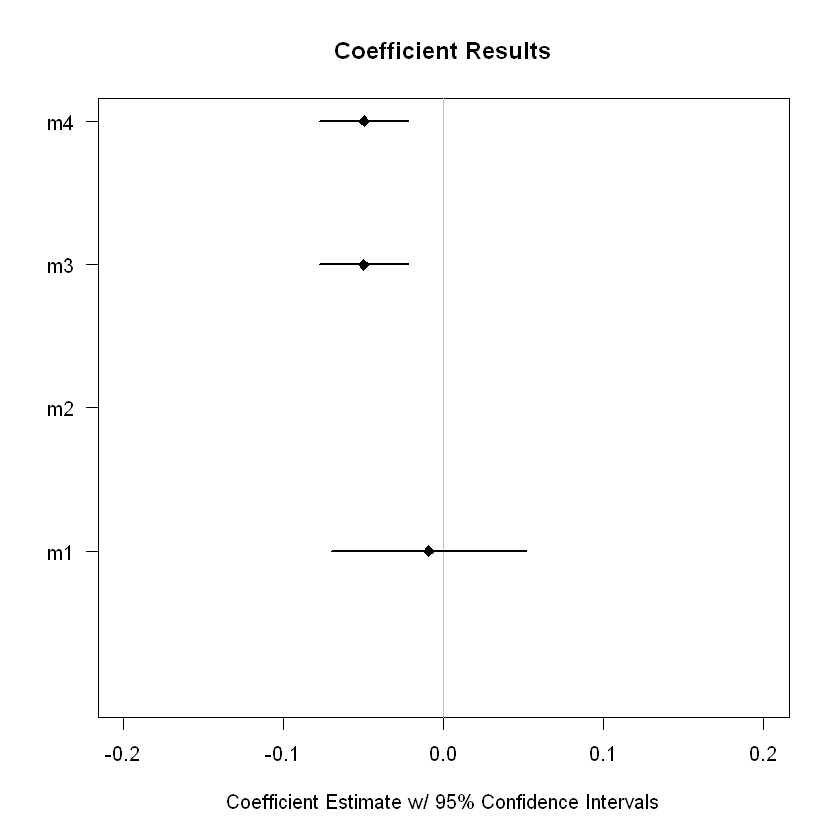

In [21]:
plot(NA, xlim = c(-0.2, 0.2), ylim = c(0, 4), xlab = "Coefficient Estimate w/ 95% Confidence Intervals", ylab = "", yaxt = "n")
# We can add a title:
title("Coefficient Results")

# We'll add a y-axis labelling our variables:
axis(2, 1:4, c("m1", "m2", "m3", "m4"), las = 2)

# We'll add a vertical line for zero:
abline(v = 0, col = "gray")

# Then we'll draw our slopes as points:
points(est_ols, 1, pch = 23, col = "black", bg = "black")
points(est_tlasso, 3, pch = 23, col = "black", bg = "black")
points(est_lasso, 4, pch = 23, col = "black", bg = "black")

#Adding confidence intervals
segments(ci_ols[1], 1, ci_ols[2], 1, col = "black", lwd = 2)
segments(ci_lasso[1], 3, ci_lasso[2], 3, col = "black", lwd = 2)
segments(ci_lasso[1], 4, ci_lasso[2], 4, col = "black", lwd = 2)

Models
- m1: Ordinary least square (OLS)
- m2: Double lasso using cross validation
- m3: Double lasso using theoretical Lambda
- m4: Double lasso using partialling-out

This graph shows the estimated coefficients of the four models. First, the m1 model shows that the coefficient is not significant, since the confidence interval includes the zero value. Second, we did not graph the estimated coefficient of m2, since this left us 1 with 0 of standard error, in that sense, we consider that we made some mistake in the estimation process. Third, the estimated coefficients of m3 and m4 are significant, since the confidence intervals do not include the value of zero.